In [1]:
# Import Libraries
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import scipy
from scipy import ndimage
from matplotlib.lines import Line2D
from pylab import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from numpy import histogram2d as histogram2d
from numpy import sqrt, pi, exp, loadtxt
from lmfit import Model
from matplotlib.colors import LogNorm
from matplotlib import contour
from copy import deepcopy

In [2]:
# Read data

dis = fits.open('NGC628_distance_grow.fits')
dis.info()
d = dis[0].data
dis.close()

limm = fits.open('NGC628_dimension_regions.fits')
limm.info()
lim = limm[0].data
limm.close()


# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_dataha = ahdu_list1[0].data
ahdu_list1.close()

fhdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits')
fhdu_list1.info()
fimage_dataha = fhdu_list1[0].data
fhdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits')
ahdu_list2.info()
aimage_datan2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits')
ahdu_list3.info()
aimage_datan21 = ahdu_list3[0].data
ahdu_list3.close()



fhdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.fwhm.clean.fits')
fhdu_list2.info()
fimage_datan2 = fhdu_list2[0].data
fhdu_list2.close()

fhdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.fwhm.clean.fits')
fhdu_list3.info()
fimage_datan21 = fhdu_list3[0].data
fhdu_list3.close()
                    
s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_datan2[np.where(aimage_datan2 < 1e-18)] = 0
aimage_datan21[np.where(aimage_datan21 < 1e-18)] = 0
fimage_datan2[np.where(aimage_datan2 < 1e-18)] = 0
fimage_datan21[np.where(aimage_datan21 < 1e-18)] = 0
aimage_dataha[np.where(aimage_dataha < 1e-18)] = 0

                       
image_data = (((aimage_datan2*fimage_datan2)+(aimage_datan21*fimage_datan21))/(1.339*aimage_dataha*fimage_dataha))
#image_data[(aimage_dataha >= 1.2e-18) & (image_data == 0)] = 0.001
image_data = np.log10(image_data)
#image_data[np.where(aimage_dataha < 1.2e-18)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
image_data[np.where(image_data == 0)] = 500
n2h = image_data

# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.amplitude.clean.int3.fits')
ahdu_list1.info()
aimage_datao3 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits')
ahdu_list2.info()
aimage_datahb = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN2_1.0.LineMaps.map.4959.amplitude.clean.int3.fits')
ahdu_list3.info()
aimage_datao31 = ahdu_list3[0].data
ahdu_list3.close()

fhdu_list1 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.fwhm.clean.int3.fits')
fhdu_list1.info()
fimage_datao3 = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits')
fhdu_list2.info()
fimage_datahb = fhdu_list2[0].data
fhdu_list2.close()

fhdu_list3 = fits.open('NGC628_SN2_1.0.LineMaps.map.4959.fwhm.clean.int3.fits')
fhdu_list3.info()
fimage_datao31 = fhdu_list3[0].data
fhdu_list3.close()
                    

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_datao3[np.where(aimage_datao3 < 4e-19)] = 0
aimage_datahb[np.where(aimage_datahb < 4e-19)] = 0
fimage_datao3[np.where(fimage_datao3 < 4e-19)] = 0
fimage_datahb[np.where(fimage_datahb < 4e-19)] = 0
aimage_datao31[np.where(aimage_datao31 < 4e-19)] = 0
fimage_datao31[np.where(fimage_datao31 < 4e-19)] = 0
                       
image_data = (((aimage_datao3*fimage_datao3)+(aimage_datao31*fimage_datao31))/(1.333*aimage_datahb*fimage_datahb))
#image_data[(aimage_datahb >= 4e-19) & (image_data == 0)] = 0.000001
image_data = np.log10(image_data)
#image_data[(aimage_datahb < 5.5e-19) & (aimage_datao3 < 5.5e-19)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
#image_data[(image_data > 1.5) & (image_data < 499)] = 5
o3h = deepcopy(image_data)
# Read Fits Data and Data Header

ahdu_list22 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.amplitude.clean.fits')
ahdu_list22.info()
aimage_datas21 = ahdu_list22[0].data
ahdu_list22.close()

ahdu_list33 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.amplitude.clean.fits')
ahdu_list33.info()
aimage_datas22 = ahdu_list33[0].data
ahdu_list33.close()

fhdu_list22 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.fwhm.clean.fits')
fhdu_list22.info()
fimage_datas21 = fhdu_list22[0].data
fhdu_list22.close()

fhdu_list33 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.fwhm.clean.fits')
fhdu_list33.info()
fimage_datas22 = fhdu_list33[0].data
fhdu_list33.close()
                    
aimage_datas21[np.where(aimage_datas21 < 1e-18)] = 0
aimage_datas22[np.where(aimage_datas22 < 1e-18)] = 0
fimage_datas21[np.where(aimage_datas21 < 1e-18)] = 0
fimage_datas22[np.where(aimage_datas22 < 1e-18)] = 0
                       
image_data = (((aimage_datas21*fimage_datas21)+(aimage_datas22*fimage_datas22))/(aimage_dataha*fimage_dataha))
#image_data[(aimage_dataha >= 1.2e-18) & (image_data == 0)] = 0.001
image_data = np.log10(image_data)
#image_data[np.where(aimage_dataha < 1.2e-18)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
image_data[np.where(image_data == 0)] = 500
s2h = deepcopy(image_data)

                       
image_data = (((aimage_datas21*fimage_datas21)/(aimage_datas22*fimage_datas22)))
#image_data[(aimage_dataha >= 1.2e-18) & (image_data == 0)] = 0.001
image_data = np.log10(image_data)
image_data[np.where(aimage_dataha < 1e-18)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
image_data[np.where(image_data == 0)] = 500
s2s2 = deepcopy(image_data)

flux_tot = fits.getdata('NGC628_flux_tot_regions.fits')
# Read Fits Data and Data Header

ahdu_list222 = fits.open('NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits')
ahdu_list222.info()
aimage_datao2 = ahdu_list222[0].data
ahdu_list222.close()

ahdu_list222 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.flux.extcor.clean.int33.fits')
ahdu_list222.info()
aimage_datao3e = ahdu_list222[0].data
ahdu_list222.close()

ahdu_list222 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.flux.extcor.clean.int33.fits')
ahdu_list222.info()
aimage_datan2e = ahdu_list222[0].data
ahdu_list222.close()

ahdu_list333 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits')
ahdu_list333.info()
aimage_datahbe = ahdu_list333[0].data
ahdu_list333.close()
                       
image_data = ((aimage_datao2)/(aimage_datahbe))
#image_data[(aimage_dataha >= 1.2e-18) & (image_data == 0)] = 0.001
image_data = np.log10(image_data)
image_data[np.where(aimage_datahbe < 4e-19)] = 500
image_data[np.where(aimage_datao2 < 7e-17)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
image_data[np.where(image_data == 0)] = 500
o2h = deepcopy(image_data)

image_data = (((aimage_datao2)+(aimage_datao3e))/(aimage_datahbe))
#image_data[(aimage_dataha >= 1.2e-18) & (image_data == 0)] = 0.001
image_data = np.log10(image_data)
image_data[np.where(aimage_datahbe < 4e-19)] = 500
image_data[np.where(aimage_datao3 < 4e-19)] = 500
image_data[np.where(aimage_datao2 < 7e-17)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
image_data[np.where(image_data == 0)] = 500
o3o2h = deepcopy(image_data)

Filename: NGC628_distance_grow.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (2048, 2064)   float32   
Filename: NGC628_dimension_regions.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       5   (4285,)      float64   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PR

Filename: NGC628_SN2_1.0.LineMaps.map.5007.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4959.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.5007.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4959.fwhm.clean.i

In [3]:
r= fits.open('NGC628_SITELLE_rayon_pc_carte.fits')
r.info()
ra = r[0].data
r.close()

Filename: NGC628_SITELLE_rayon_pc_carte.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


In [4]:

fn2h = deepcopy(n2h)
fo3h = deepcopy(o3h)
fo2h = deepcopy(o2h)
fo3o2h = np.zeros([2064,2048])
fs2s2 = np.zeros([2064,2048])
fo3o2h = deepcopy(o3o2h)
fs2s2 = deepcopy(s2s2)


In [5]:
gr= fits.open('NGC628_HIIPhot3_All_GROW.fits')
gr.info()
grow = gr[0].data
gr.close()
med = fits.getdata('NGC628_background.regions.fits')
grow2 = grow
for i in range(0,np.max(grow)):
    grow2[(grow == i+1)] = med[i]



Filename: NGC628_HIIPhot3_All_GROW.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


In [6]:
ffn2h = np.array(len(n2h[(fn2h > -3) & (fo3h > -5) & (fn2h < 500) & (fo3h < 500)]))
ffo3h = np.array(len(n2h[(fn2h > -3) & (fo3h > -5) & (fn2h < 500) & (fo3h < 500)]))
rr = np.array(len(n2h[(fn2h > -3) & (fo3h > -5) & (fn2h < 500) & (fo3h < 500)]))
dd = np.array(len(n2h[(fn2h > -3) & (fo3h > -5) & (fn2h < 500) & (fo3h < 500)]))
#for i in range(0,len(n2h[(n2h > -3) & (o3h > -5)])) :
ffn2h = fn2h[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
ffo3h = fo3h[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
rr = ra[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
dd = d[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]
flu = (1.20671*10*aimage_dataha[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]*\
    fimage_dataha[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)])
fflu = flu - grow2[(fn2h > -3) & (fo3h > -5) &(fn2h < 500) & (fo3h < 500)]

In [7]:
fit = np.polyfit(rr[(np.log10(fflu) > -16)]/1000, ffo3h[(np.log10(fflu) > -16)] - np.log10(10**(ffn2h[(np.log10(fflu) > -16)])*2.87),4)
print fit
fitt = np.poly1d(fit)
print fitt

[  1.17606073e-04  -5.32541207e-03   7.61723963e-02  -2.17272427e-01
  -6.92091724e-01]
           4            3           2
0.0001176 x - 0.005325 x + 0.07617 x - 0.2173 x - 0.6921


<IPython.core.display.Javascript object>


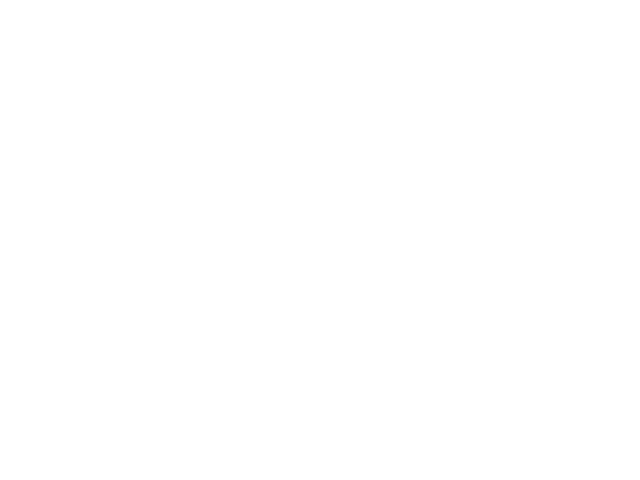

In [8]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
#plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffo3h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] - np.log10(10**(ffn2h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)])*2.87), marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffo3h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] - np.log10(10**(ffn2h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)])*2.87) , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffo3h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] - np.log10(10**(ffn2h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)])*2.87) , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffo3h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] - np.log10(10**(ffn2h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)])*2.87) , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffo3h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] - np.log10(10**(ffn2h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)])*2.87) , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffo3h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] - np.log10(10**(ffn2h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)])*2.87) , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
plt.scatter(rr[0]/1000, ffo3h[0], marker='.', c=np.log10(fflu[0]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:05.4f}'.format(fitt[3])+'x$^3$'+'+'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.08,0.03),xycoords='axes fraction',\
#            fontsize=12.0, color='k', backgroundcolor='w')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,[NII]\lambda6583}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-2.5,2.5)
plt.show()    

In [14]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIIINII_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


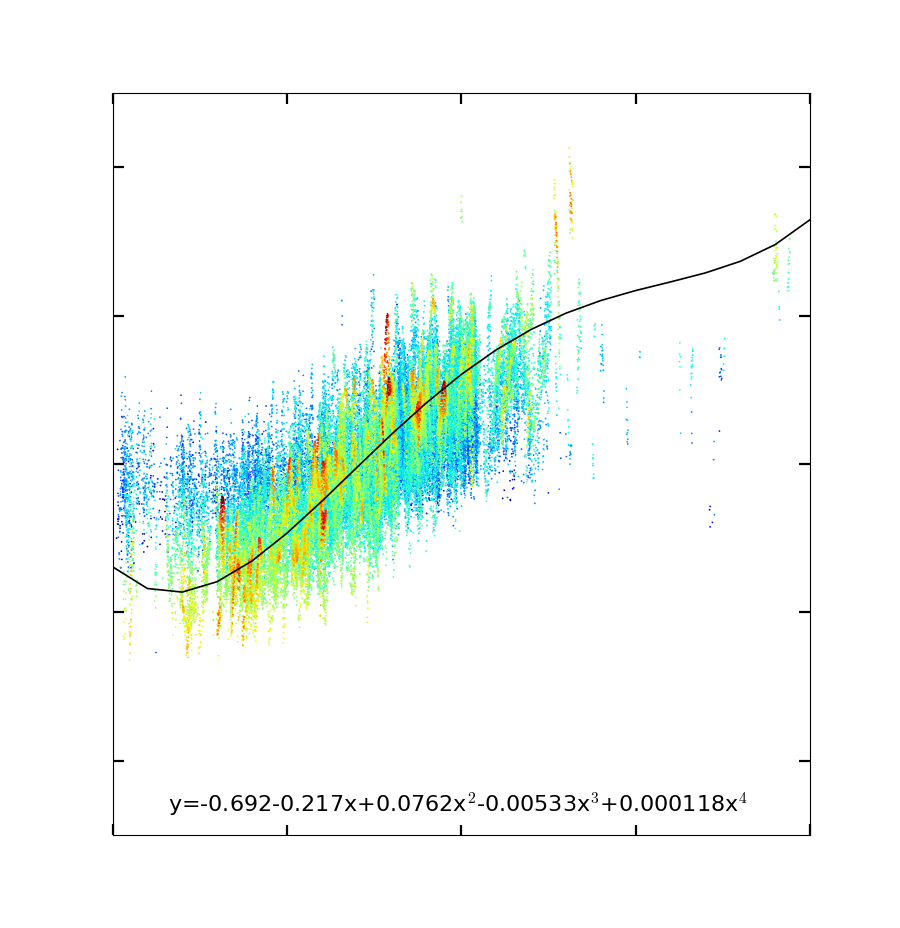

In [10]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffo3h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] - np.log10(10**(ffn2h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)])*2.87), marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffo3h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] - np.log10(10**(ffn2h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)])*2.87) , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffo3h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] - np.log10(10**(ffn2h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)])*2.87) , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffo3h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] - np.log10(10**(ffn2h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)])*2.87) , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffo3h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] - np.log10(10**(ffn2h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)])*2.87) , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffo3h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] - np.log10(10**(ffn2h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)])*2.87) , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) > -15)]/1000, ffo3h[(np.log10(fflu) > -15)] - np.log10(10**(ffn2h[(np.log10(fflu) > -15)])*2.87), marker='.', c=np.log10(fflu[(np.log10(fflu) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'{:04.3f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:06.5f}'.format(fitt[3])+'x$^3$'+'+'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.08,0.03),xycoords='axes fraction',\
            fontsize=20.0, color='k', backgroundcolor='w')
#plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel('$\mathrm{log\,\,[OIII]\lambda5007\,/\,[NII]\lambda6583}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-2.5,2.5)
plt.show()    

In [11]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIIINII_rayon.png', transparent=False, bbox_inches='tight', pad_inches=0.)

In [12]:
ffo3h = np.array(len(o3h[(fo3h > -3) & (fo3h < 500)]))
rr = np.array(len(o3h[(fo3h > -3) & (fo3h < 500)]))
dd = np.array(len(o3h[(fo3h > -3) & (fo3h < 500)]))
#for i in range(0,len(n2h[(n2h > -3) & (o3h > -5)])) :
ffo3h = fo3h[(fo3h > -3) & (fo3h < 500)]
rr = ra[(fo3h > -3) & (fo3h < 500)]
dd = d[(fo3h > -3) & (fo3h < 500)]
ffo3h[(rr > 20000)] = 0.5
flu = (1.20671*10*aimage_dataha[(fo3h > -3) & (fo3h < 500)]*\
    fimage_dataha[(fo3h > -3) & (fo3h < 500)])
fflu = flu - grow2[(fo3h > -3) & (fo3h < 500)]


In [13]:

fit = np.polyfit(rr[(np.log10(fflu) > -16) & (ffo3h > -2.5) & (ffo3h < 1)]/1000, ffo3h[(np.log10(fflu) > -16) & (ffo3h > -2.5) & (ffo3h < 1)],4)
print fit
fitt = np.poly1d(fit)
print fitt

[  1.41433423e-04  -5.83287038e-03   7.39678046e-02  -1.96755870e-01
  -7.95591881e-01]
           4            3           2
0.0001414 x - 0.005833 x + 0.07397 x - 0.1968 x - 0.7956


<IPython.core.display.Javascript object>


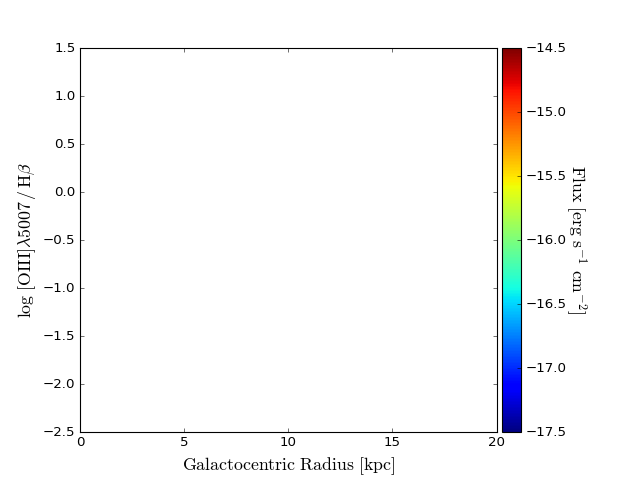

In [82]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
#plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffo3h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffo3h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffo3h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffo3h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffo3h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffo3h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
plt.scatter(rr[0]/1000, ffo3h[0], marker='.', c=np.log10(fflu[0]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:05.4f}'.format(fitt[3])+'x$^3$'+'+'+'{:06.5f}'.format(fitt[4])+'x$^4$', xy=(0.08,0.03),xycoords='axes fraction',\
#            fontsize=12.0, color='k', backgroundcolor='w')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{log\,\,[OIII]\lambda5007\,/\,H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-2.5,1.5)
plt.show()    

In [40]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIIIHb_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


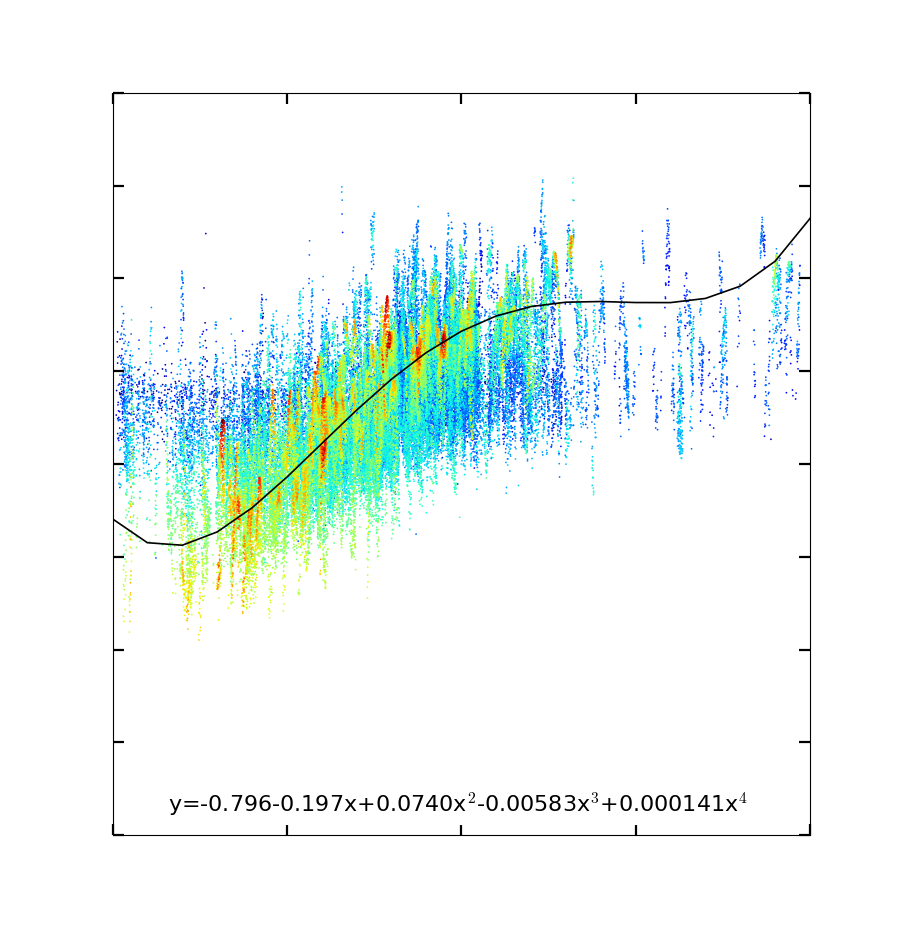

In [15]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffo3h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffo3h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffo3h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffo3h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffo3h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffo3h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) > -15)]/1000, ffo3h[(np.log10(fflu) > -15)], marker='.', c=np.log10(fflu[(np.log10(fflu) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'{:04.3f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:06.5f}'.format(fitt[3])+'x$^3$'+'+'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.08,0.03),xycoords='axes fraction',\
            fontsize=20.0, color='k', backgroundcolor='w')
#plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel(r'$\mathrm{log\,\,[OIII]\lambda5007\,/\,H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-2.5,1.5)
plt.show()    

In [16]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIIIHb_rayon.png', transparent=False, bbox_inches='tight', pad_inches=0.0)

In [29]:
ffo2h = np.array(len(fo2h[(fo2h > -3) & (fo2h < 500)]))
rr = np.array(len(fo2h[(fo2h > -3) & (fo2h < 500)]))
dd = np.array(len(fo2h[(fo2h > -3) & (fo2h < 500)]))
#for i in range(0,len(n2h[(n2h > -3) & (o3h > -5)])) :
ffo2h = fo2h[(fo2h > -3) & (fo2h < 500)]
rr = ra[(fo2h > -3) & (fo2h < 500)]
dd = d[(fo2h > -3) & (fo2h < 500)]
#ffo2h[(rr > 20000)] = 2
flu = (1.20671*10*aimage_dataha[(fo2h > -3) & (fo2h < 500)]*\
    fimage_dataha[(fo2h > -3) & (fo2h < 500)])
fflu = flu - grow2[(fo2h > -3) & (fo2h < 500)]

In [30]:
fit = np.polyfit(rr[(np.log10(fflu) > -16.5)]/1000, ffo2h[(np.log10(fflu) > -16.5)],4)
print fit
fitt = np.poly1d(fit)
print fitt

[ -1.83744193e-06  -1.22954193e-04   1.51893474e-03   4.89293080e-02
   8.44136790e-02]
            4            3            2
-1.837e-06 x - 0.000123 x + 0.001519 x + 0.04893 x + 0.08441


//anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


<IPython.core.display.Javascript object>


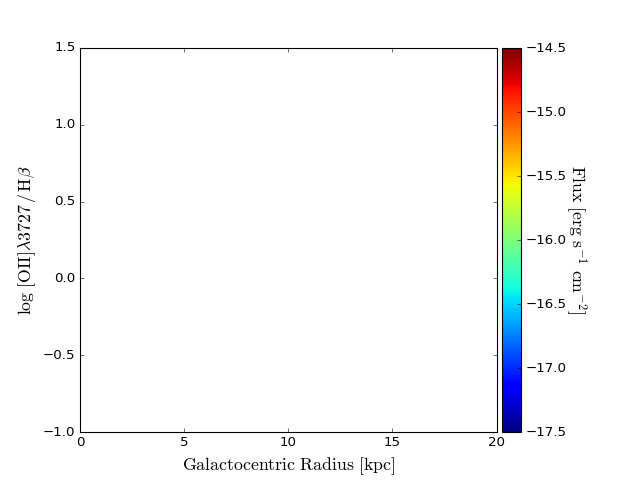

In [229]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
#plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffo2h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffo2h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffo2h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffo2h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffo2h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffo2h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
plt.scatter(rr[0]/1000, ffo2h[0], marker='.', c=np.log10(fflu[0]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:05.4f}'.format(fitt[3])+'x$^3$'+'+'+'{:06.5f}'.format(fitt[4])+'x$^4$', xy=(0.08,0.03),xycoords='axes fraction',\
#            fontsize=12.0, color='k', backgroundcolor='w')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{log\,\,[OII]\lambda3727\,/\,H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1,1.5)
plt.show()    

In [202]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIIHb_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


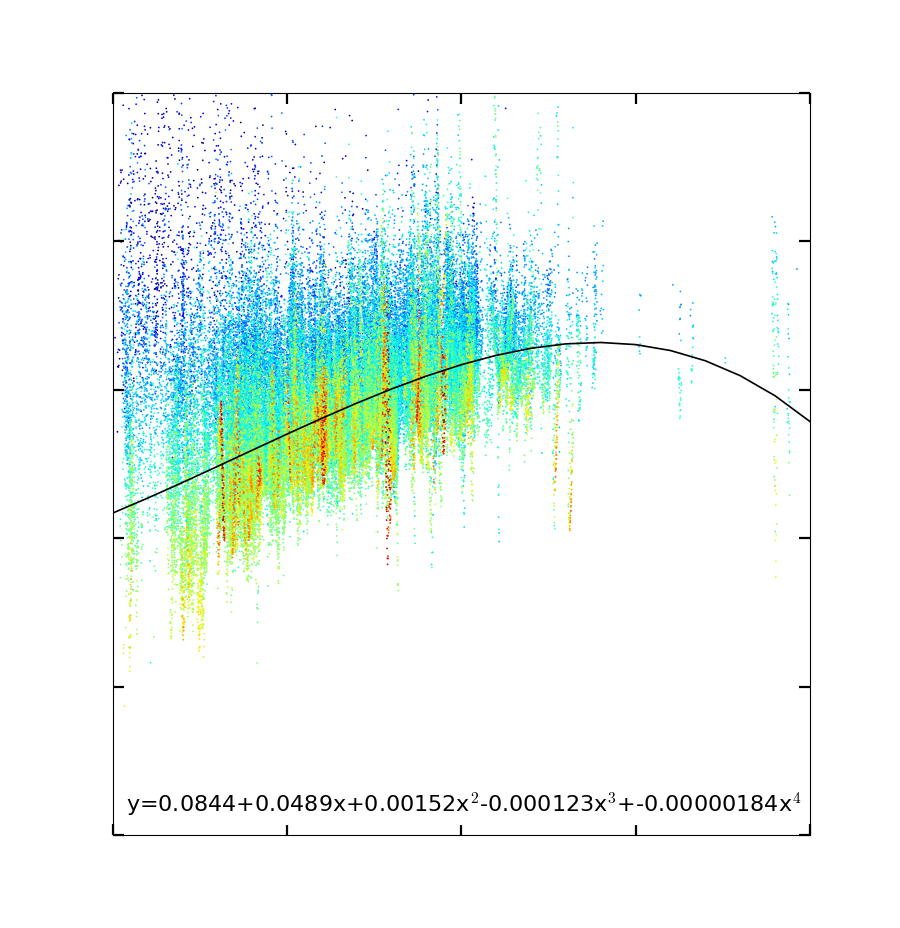

In [31]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffo2h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffo2h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffo2h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffo2h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffo2h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffo2h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) > -15)]/1000, ffo2h[(np.log10(fflu) > -15)], marker='.', c=np.log10(fflu[(np.log10(fflu) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:09.8f}'.format(fitt[4])+'x$^4$', xy=(0.02,0.03),xycoords='axes fraction',\
            fontsize=20.0, color='k', backgroundcolor='w')
#plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel(r'$\mathrm{log\,\,[OII]\lambda3727\,/\,H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1,1.5)
plt.show()    

In [32]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIIHb_rayon.png', transparent=True, bbox_inches='tight', pad_inches=0.0)

In [33]:
fs2h = deepcopy(s2h)
fs2h[(aimage_dataha < 1.2e-18) & (aimage_datas21 < 0.2e-18)] = -3
fs2h[(fs2h == 0)] = -3

ffs2h = np.array(len(s2h[(s2h > -3) & (o3h > -5)]) & (fs2h < 500) & (fo3h < 500))
ffo3hs = np.array(len(s2h[(s2h > -3) & (o3h > -5)]) & (fs2h < 500) & (fo3h < 500))
ffn2hs = np.array(len(s2h[(s2h > -3) & (o3h > -5)]) & (fs2h < 500) & (fo3h < 500))
rrs = np.array(len(s2h[(s2h > -3) & (o3h > -5)]) & (fs2h < 500) & (fo3h < 500))
dd = np.array(len(s2h[(s2h > -3) & (o3h > -5)]) & (fs2h < 500) & (fo3h < 500))

ffs2h = fs2h[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)]
ffo3hs = fo3h[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)]
ffn2hs = fn2h[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)]

flus = (1.20671*10*aimage_dataha[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)]*\
    fimage_dataha[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)])
fflus = flus - grow2[(fs2h > -3) & (fo3h > -5) &(fs2h < 500) & (fo3h < 500)]


In [34]:
fo2h = deepcopy(o2h)
fo3h = deepcopy(o3h)

ffo2h = np.array(len(o2h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]))
ffo3h = np.array(len(o2h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]))
ffo3ho = np.array(len(o2h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]))
ffn2ho2 = np.array(len(o2h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]))
ffn2ho3 = np.array(len(o2h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]))
rro = np.array(len(o2h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]))
ddd = np.array(len(o2h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]))
ffn2ho2 = fn2h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]
ffn2ho3 = fn2h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]

ffo2h = fo2h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]
ffo3h = fo3h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]
ffo3ho = fo3h[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]
ddd = d[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]
rro = ra[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]

fluo = (1.20671*10*aimage_dataha[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]*\
    fimage_dataha[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)])
ffluo = fluo - grow2[(o2h > -5) & (n2h > -3) & (fo2h < 500) & (fn2h < 500)]


In [35]:
fit = np.polyfit(rro[(np.log10(ffluo) > -16)]/1000, ffo2h[(np.log10(ffluo) > -16)]-np.log10(10**(ffn2ho2[(np.log10(ffluo) > -16)])*2.87),4)
print fit
fitt = np.poly1d(fit)
print fitt

[  5.46486053e-06  -6.41277886e-04   1.18942119e-02   2.81544843e-02
   2.52913162e-02]
           4             3           2
5.465e-06 x - 0.0006413 x + 0.01189 x + 0.02815 x + 0.02529


<IPython.core.display.Javascript object>


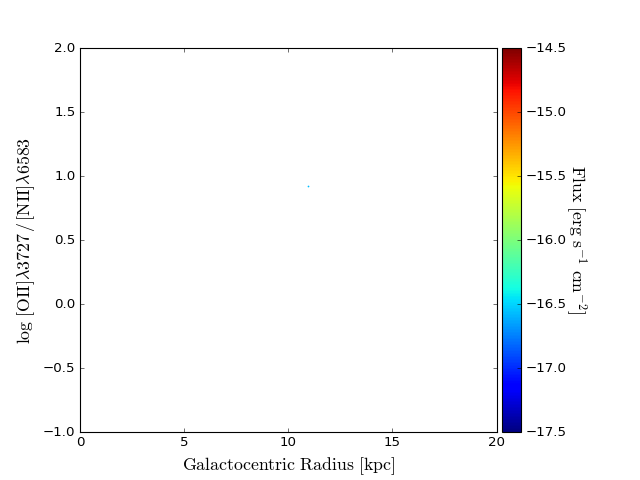

In [18]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
#plt.scatter(rro[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]/1000, ffo2h[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)])*2.87), marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]/1000, ffo2h[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]/1000, ffo2h[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]/1000, ffo2h[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]/1000, ffo2h[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]/1000, ffo2h[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
plt.scatter(rro[0]/1000, ffo2h[0], marker='.', c=np.log10(ffluo[0]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.1,0.03),xycoords='axes fraction',\
#            fontsize=12.0, color='k', backgroundcolor='w')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel('$\mathrm{log\,\,[OII]\lambda3727\,/\,[NII]\lambda6583}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1,2)
plt.show()    

In [19]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIINII_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


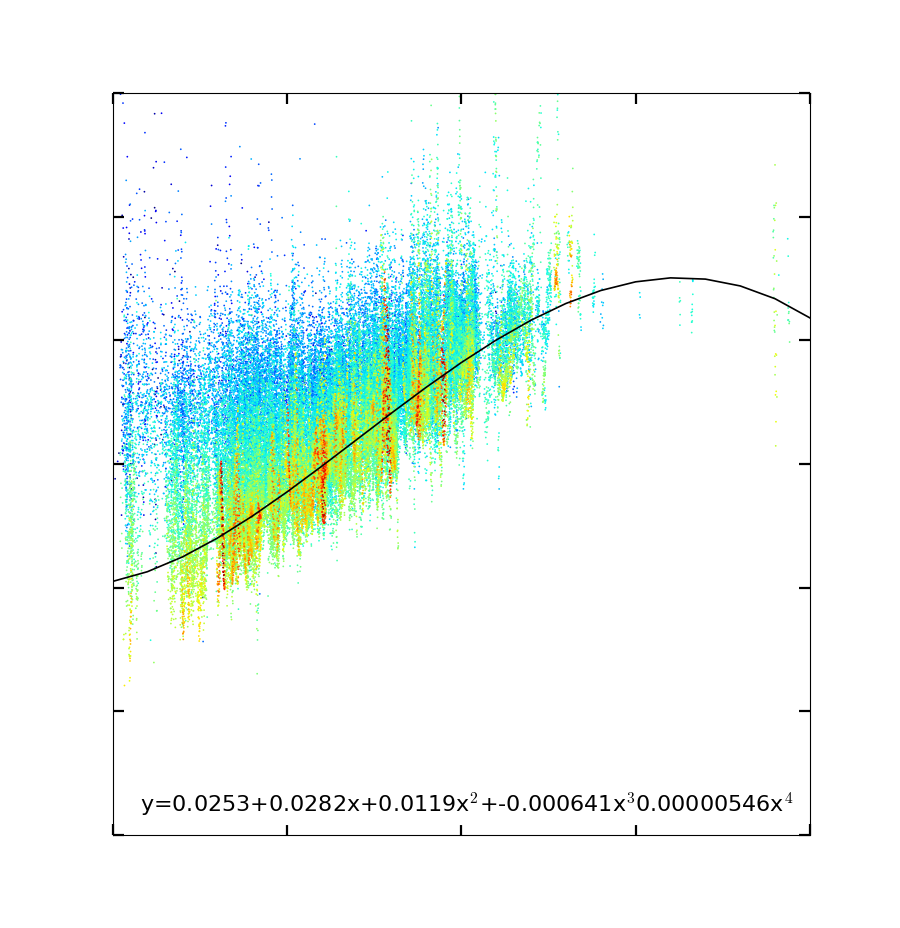

In [36]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(rro[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]/1000, ffo2h[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)])*2.87), marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]/1000, ffo2h[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]/1000, ffo2h[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]/1000, ffo2h[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]/1000, ffo2h[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]/1000, ffo2h[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rro[(np.log10(ffluo) > -15)]/1000, ffo2h[(np.log10(ffluo) > -15)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) > -15)])*2.87), marker='.', c=np.log10(ffluo[(np.log10(ffluo) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'+'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'{:09.8f}'.format(fitt[4])+'x$^4$', xy=(0.04,0.03),xycoords='axes fraction',\
            fontsize=20.0, color='k', backgroundcolor='w')
#plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel('$\mathrm{log\,\,[OII]\lambda3727\,/\,[NII]\lambda6583}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1,2)
plt.show()    

In [37]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIINII_rayon.png', transparent=False, bbox_inches='tight', pad_inches=0.0)

In [38]:
fn2h = deepcopy(n2h)
fo3h = deepcopy(o3h)
fo2h = deepcopy(o2h)
fn2h[(aimage_dataha < 1.2e-18)] = -3
fn2h[(aimage_datan2 < 0.2e-18)] = -3
fo3h[(aimage_dataha < 1.2e-18)] = -5
fo3h[(aimage_datao3 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fo2h[(aimage_dataha < 1.2e-18) ] = -5
fo2h[(aimage_datao2 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fn2h[(fn2h == 0)] = -3
fo3h[(fo3h == 0)] = -5
fo2h[(fo2h == 0)] = -5
ffn2h = np.array(len(n2h[(fn2h > -3) & (fn2h < 500)]))
rr = np.array(len(n2h[(fn2h > -3) & (fn2h < 500)]))
dd = np.array(len(n2h[(fn2h > -3) & (fn2h < 500)]))
#for i in range(0,len(n2h[(n2h > -3) & (o3h > -5)])) :
ffn2h = fn2h[(fn2h > -3) & (fn2h < 500)]
rr = ra[(fn2h > -3) & (fn2h < 500)]
dd = d[(fn2h > -3) & (fn2h < 500)]
flu = (1.20671*10*aimage_dataha[(fn2h > -3) & (fn2h < 500)]*\
    fimage_dataha[(fn2h > -3) & (fn2h < 500)])
fflu = flu - grow2[(fn2h > -3) & (fn2h < 500)]

In [39]:
fit = np.polyfit(rr[(np.log10(fflu) > -16.5)]/1000, ffn2h[(np.log10(fflu) > -16.5)],4)
print fit
fitt = np.poly1d(fit)
print fitt

[  2.96536359e-05  -6.02569597e-04  -2.98971529e-03   4.77233984e-02
  -7.13773395e-01]
           4             3           2
2.965e-05 x - 0.0006026 x - 0.00299 x + 0.04772 x - 0.7138


//anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


<IPython.core.display.Javascript object>


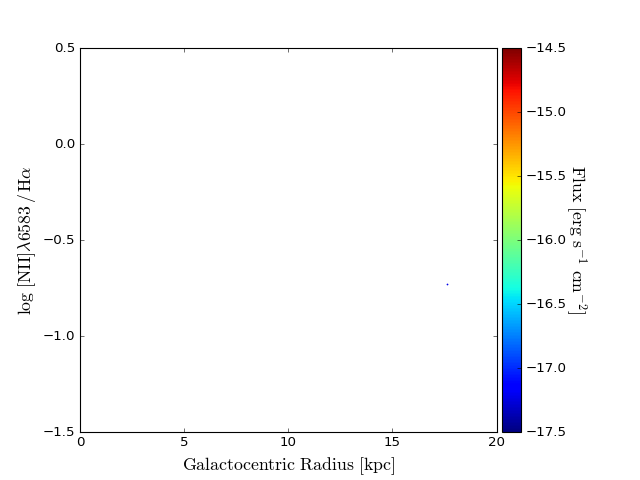

In [244]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
#plt.scatter(rro[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]/1000, ffo2h[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)])*2.87), marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]/1000, ffo2h[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]/1000, ffo2h[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]/1000, ffo2h[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]/1000, ffo2h[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]/1000, ffo2h[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
plt.scatter(rr[0]/1000, ffn2h[0], marker='.', c=np.log10(fflu[0]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.1,0.03),xycoords='axes fraction',\
#            fontsize=12.0, color='k', backgroundcolor='w')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{log\,\,[NII]\lambda6583\,/\,H\alpha}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1.5,0.5)
plt.show()    

In [219]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_NIIHa_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


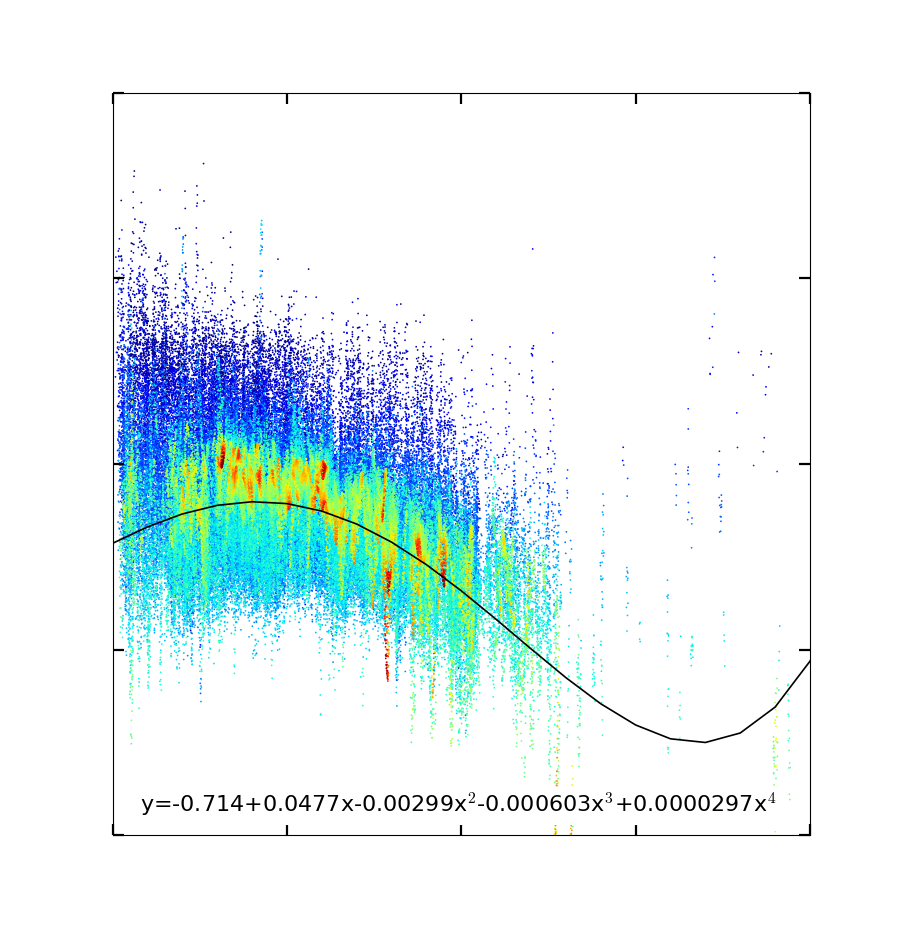

In [41]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffn2h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffn2h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffn2h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffn2h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffn2h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffn2h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) > -15)]/1000, ffn2h[(np.log10(fflu) > -15)], marker='.', c=np.log10(fflu[(np.log10(fflu) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.15, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.15, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.04,0.03),xycoords='axes fraction',\
            fontsize=20.0, color='k', backgroundcolor='w')
#plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel(r'$\mathrm{log\,\,[OIII]\lambda5007\,/\,H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1.5,0.5)
plt.show()    

In [42]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_NIIHa_rayon.png', transparent=False, bbox_inches='tight', pad_inches=0.0)

In [43]:
fs2h = deepcopy(s2h)
fn2h = deepcopy(n2h)
fo3h = deepcopy(o3h)
fo2h = deepcopy(o2h)
fn2h[(aimage_dataha < 1.2e-18)] = -3
fn2h[(aimage_datan2 < 0.2e-18)] = -3
fs2h[(aimage_dataha < 1.2e-18)] = -3
fs2h[(aimage_datas21 < 0.2e-18)] = -3
fo3h[(aimage_dataha < 1.2e-18)] = -5
fo3h[(aimage_datao3 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fo2h[(aimage_dataha < 1.2e-18) ] = -5
fo2h[(aimage_datao2 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fn2h[(fn2h == 0)] = -3
fs2h[(fs2h == 0)] = -3
fo3h[(fo3h == 0)] = -5
fo2h[(fo2h == 0)] = -5
ffn2h = np.array(len(n2h[(fn2h > -3) & (fn2h < 500)]))
ffs2h = np.array(len(s2h[(fs2h > -3) & (fs2h < 500)]))
rr = np.array(len(s2h[(fs2h > -3) & (fs2h < 500)]))
dd = np.array(len(s2h[(fs2h > -3) & (fs2h < 500)]))
#for i in range(0,len(n2h[(n2h > -3) & (o3h > -5)])) :
ffs2h = fs2h[(fs2h > -3) & (fs2h < 500)]
rr = ra[(fs2h > -3) & (fs2h < 500)]
dd = d[(fs2h > -3) & (fs2h < 500)]
flu = (1.20671*10*aimage_dataha[(fs2h > -3) & (fs2h < 500)]*\
    fimage_dataha[(fs2h > -3) & (fs2h < 500)])
fflu = flu - grow2[(fs2h > -3) & (fs2h < 500)]

In [44]:
fit = np.polyfit(rr[(np.log10(fflu) > -16.5)]/1000, ffs2h[(np.log10(fflu) > -16.5)],4)
print fit
fitt = np.poly1d(fit)
print fitt

[  1.94717633e-05  -5.17149753e-04  -7.69719744e-04   5.73331628e-02
  -8.32463736e-01]
           4             3             2
1.947e-05 x - 0.0005171 x - 0.0007697 x + 0.05733 x - 0.8325


//anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


<IPython.core.display.Javascript object>


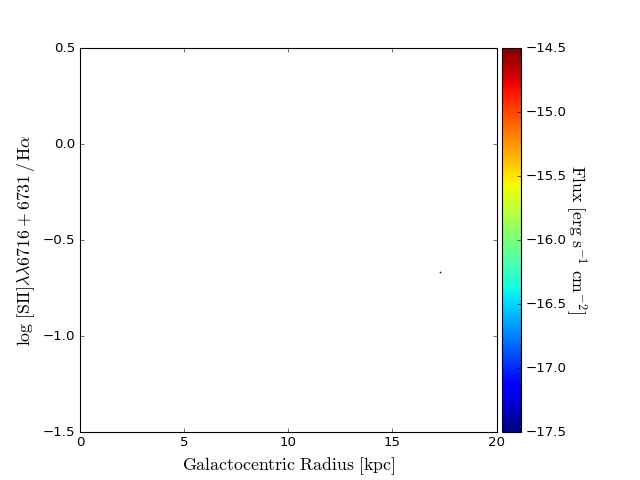

In [288]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
#plt.scatter(rro[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]/1000, ffo2h[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)])*2.87), marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]/1000, ffo2h[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]/1000, ffo2h[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]/1000, ffo2h[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]/1000, ffo2h[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]/1000, ffo2h[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
plt.scatter(rr[0]/1000, ffs2h[0], marker='.', c=np.log10(fflu[0]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.1,0.03),xycoords='axes fraction',\
#            fontsize=12.0, color='k', backgroundcolor='w')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{log\,\,[SII]\lambda\lambda6716+6731\,/\,H\alpha}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1.5,0.5)
plt.show()    

In [289]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_SIIHa_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


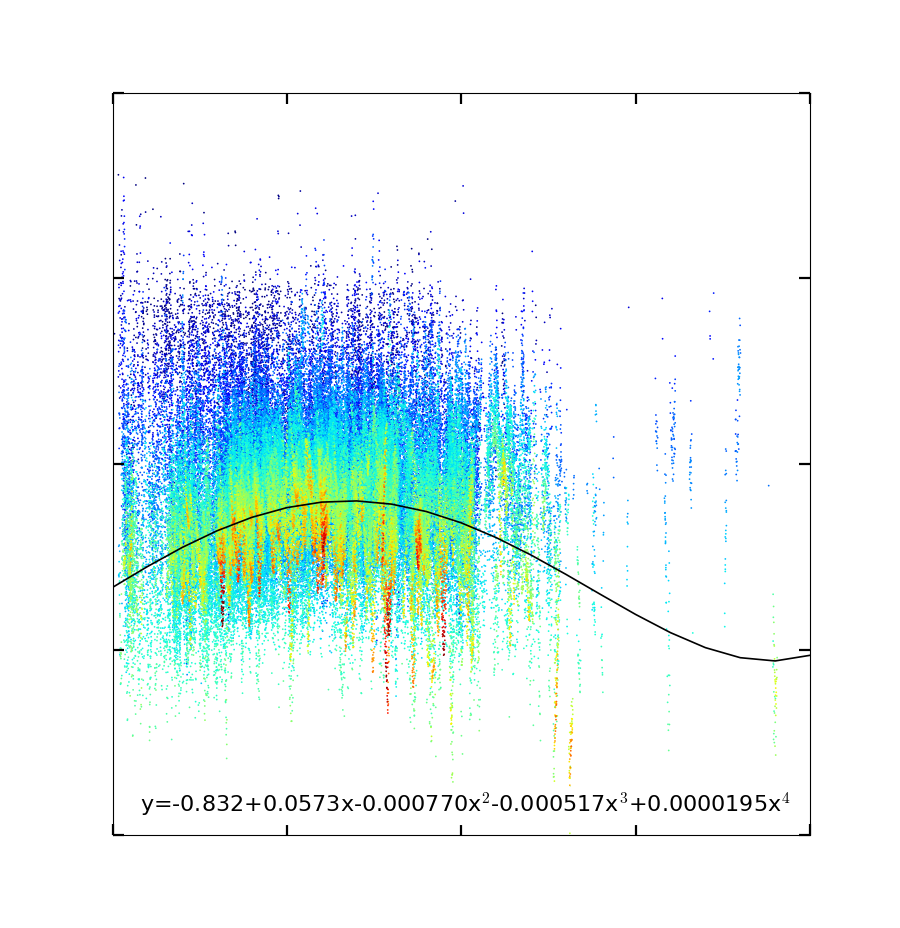

In [46]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffs2h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffs2h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffs2h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffs2h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffs2h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffs2h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) > -15)]/1000, ffs2h[(np.log10(fflu) > -15)], marker='.', c=np.log10(fflu[(np.log10(fflu) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.15, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.15, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:07.6f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.04,0.03),xycoords='axes fraction',\
            fontsize=20.0, color='k', backgroundcolor='w')
#plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel(r'$\mathrm{log\,\,[OIII]\lambda5007\,/\,H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1.5,0.5)
plt.show()    

In [47]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_SIIHa_rayon.png', transparent=False, bbox_inches='tight', pad_inches=0.0)

In [48]:
fs2n2 = deepcopy(s2h)-deepcopy(n2h)
fn2h = deepcopy(n2h)
fo3h = deepcopy(o3h)
fo2h = deepcopy(o2h)
fn2h[(aimage_dataha < 1.2e-18)] = -3
fn2h[(aimage_datan2 < 0.2e-18)] = -3
fs2h[(aimage_dataha < 1.2e-18)] = -3
fs2h[(aimage_datas21 < 0.2e-18)] = -3
fo3h[(aimage_dataha < 1.2e-18)] = -5
fo3h[(aimage_datao3 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fo2h[(aimage_dataha < 1.2e-18) ] = -5
fo2h[(aimage_datao2 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fn2h[(fn2h == 0)] = -3
fs2h[(fs2h == 0)] = -3
fo3h[(fo3h == 0)] = -5
fo2h[(fo2h == 0)] = -5
ffs2n2  = np.array(len(n2h[(fn2h > -3) & (fn2h < 500) & (fs2h > -3) & (fs2h < 500)]))
ffn2h = np.array(len(n2h[(fn2h > -3) & (fn2h < 500)]))
ffs2h = np.array(len(s2h[(fs2h > -3) & (fs2h < 500)]))
rr = np.array(len(s2h[(fn2h > -3) & (fn2h < 500) & (fs2h > -3) & (fs2h < 500)]))
dd = np.array(len(s2h[(fn2h > -3) & (fn2h < 500) & (fs2h > -3) & (fs2h < 500)]))
#for i in range(0,len(n2h[(n2h > -3) & (o3h > -5)])) :
ffs2n2 = fs2h[(fn2h > -3) & (fn2h < 500) & (fs2h > -3) & (fs2h < 500)] - fn2h[(fn2h > -3) & (fn2h < 500) & (fs2h > -3) & (fs2h < 500)]
rr = ra[(fn2h > -3) & (fn2h < 500) & (fs2h > -3) & (fs2h < 500)]
dd = d[(fn2h > -3) & (fn2h < 500) & (fs2h > -3) & (fs2h < 500)]
flu = (1.20671*10*aimage_dataha[(fn2h > -3) & (fn2h < 500) & (fs2h > -3) & (fs2h < 500)]*\
    fimage_dataha[(fn2h > -3) & (fn2h < 500) & (fs2h > -3) & (fs2h < 500)])
fflu = flu - grow2[(fn2h > -3) & (fn2h < 500) & (fs2h > -3) & (fs2h < 500)]

In [49]:
fit = np.polyfit(rr[(np.log10(fflu) > -16)]/1000, ffs2n2[(np.log10(fflu) > -16)],4)
print fit
fitt = np.poly1d(fit)
print fitt

[ -1.18478211e-05   2.80233731e-04  -9.94905531e-04   2.47730697e-02
  -2.20865150e-01]
            4             3             2
-1.185e-05 x + 0.0002802 x - 0.0009949 x + 0.02477 x - 0.2209


<IPython.core.display.Javascript object>


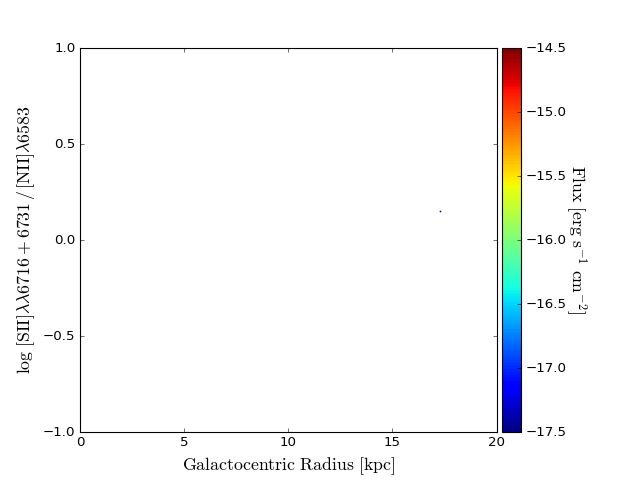

In [280]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
#plt.scatter(rro[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]/1000, ffo2h[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)])*2.87), marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]/1000, ffo2h[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]/1000, ffo2h[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]/1000, ffo2h[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]/1000, ffo2h[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]/1000, ffo2h[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
plt.scatter(rr[0]/1000, ffs2n2[0], marker='.', c=np.log10(fflu[0]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.1,0.03),xycoords='axes fraction',\
#            fontsize=12.0, color='k', backgroundcolor='w')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{log\,\,[SII]\lambda\lambda6716+6731\,/\,[NII]\lambda6583}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1.0,1.0)
plt.show()    

In [281]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_SIINII_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


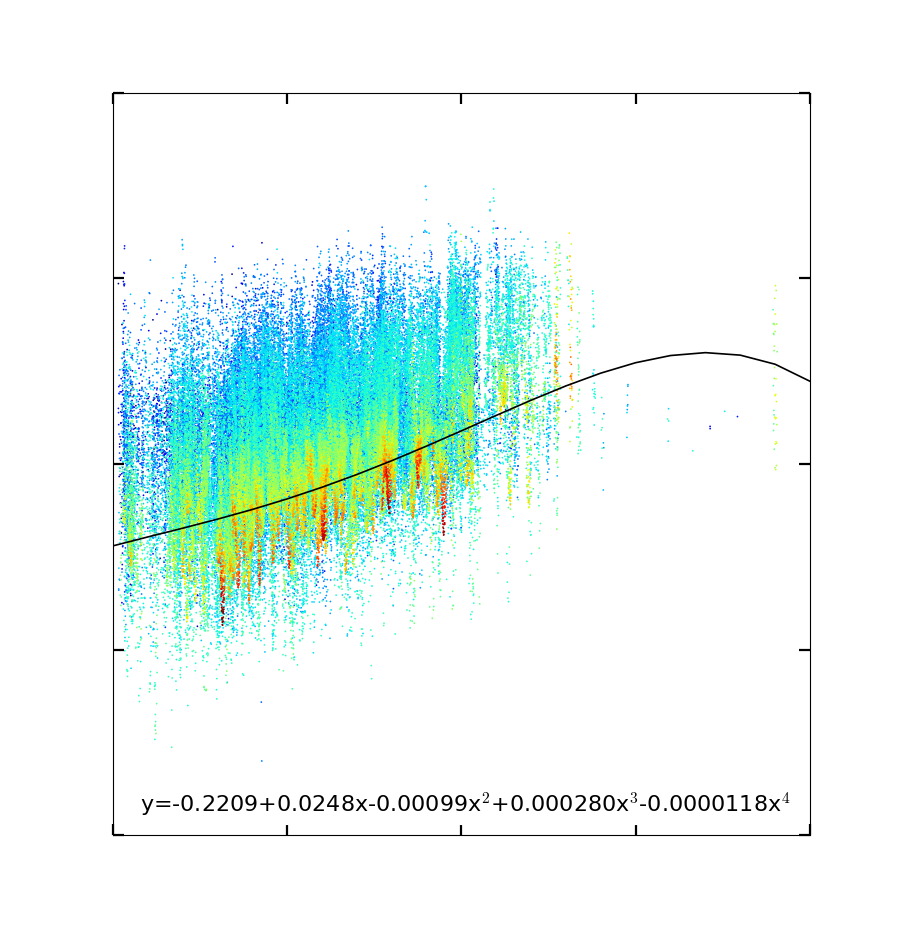

In [51]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffs2n2[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffs2n2[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffs2n2[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffs2n2[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffs2n2[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffs2n2[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) > -15)]/1000, ffs2n2[(np.log10(fflu) > -15)], marker='.', c=np.log10(fflu[(np.log10(fflu) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.15, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.15, '--k')
plt.annotate('y='+'{:04.4f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'+'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.04,0.03),xycoords='axes fraction',\
            fontsize=20.0, color='k', backgroundcolor='w')
#plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel(r'$\mathrm{log\,\,[OIII]\lambda5007\,/\,H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1.0,1.0)
plt.show()    

In [52]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_SIINII_rayon.png', transparent=False, bbox_inches='tight', pad_inches=0.0)

In [53]:
fn2h = deepcopy(n2h)
fo3h = deepcopy(o3h)
fo2h = deepcopy(o2h)
fo3o2 = np.zeros([2064,2048])
fo3o2h = np.zeros([2064,2048])
fs2s2 = np.zeros([2064,2048])
fo3o2 = fo3h - fo2h
fo3o2h = deepcopy(o3o2h)
fs2s2 = deepcopy(s2s2)
fn2h[(aimage_dataha < 1.2e-18)] = -3
fn2h[(aimage_datan2 < 0.2e-18)] = -3
fo3o2h[(aimage_dataha < 1.2e-18)] = -3
fo3h[(aimage_dataha < 1.2e-18)] = -5
fo3h[(aimage_datao3 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fo2h[(aimage_dataha < 1.2e-18) ] = -5
fo2h[(aimage_datao2 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fn2h[(fn2h == 0)] = -3
fo3h[(fo3h == 0)] = -5
fo2h[(fo2h == 0)] = -5
fs2s2[(fs2s2 == 0)] = -5
fo3o2h[(fo3o2h == 0)] = -3
fo3o2[(fo3o2 == 0)] = -3
fo3o2 = fo3h - fo2h
fo3o2[(fo3o2 == 0)] = -5

ffo3o2 = np.array(len(fo3o2[(fo2h > -3) & (fo2h < 500) & (fo3h > -3) & (fo3h < 500)]))
ffo3o2h = np.array(len(fo3o2h[(fo3o2h > -3) & (fo3o2h < 500)]))
ffs2s2 = np.array(len(fs2s2[(fs2s2 > -3) & (fs2s2 < 500)]))
rr = np.array(len(fo3o2[(fo2h > -3) & (fo2h < 500) & (fo3h > -3) & (fo3h < 500)]))
dd = np.array(len(fo3o2[(fo2h > -3) & (fo2h < 500) & (fo3h > -3) & (fo3h < 500)]))
#for i in range(0,len(n2h[(n2h > -3) & (o3h > -5)])) :
ffo3o2 = fo3o2[(fo3o2 > -3) & (fo3o2 < 3)]
ffo3o2h = fo3o2h[(fo3o2h > -3) & (fo3o2h < 500)]
ffs2s2 = fs2s2[(fs2s2 > -3) & (fs2s2 < 500)]

rr = ra[(fo3o2 > -3) & (fo3o2 < 3)]
ffo3o2[(rr > 20000)] = 0
dd = d[(fo3o2 > -3) & (fo3o2 < 3)]
flu = (1.20671*10*aimage_dataha[(fo3o2 > -3) & (fo3o2 < 3)]*\
    fimage_dataha[(fo3o2 > -3) & (fo3o2 < 3)])
fflu = flu - grow2[(fo3o2 > -3) & (fo3o2 < 3)]

In [54]:
fit = np.polyfit(rr[(np.log10(fflu) > -16)]/1000, ffo3o2[(np.log10(fflu) > -16)],4)
print fit
fitt = np.poly1d(fit)
print fitt

[  1.11331630e-04  -4.77141480e-03   6.78809852e-02  -2.78437659e-01
  -6.36753716e-01]
           4            3           2
0.0001113 x - 0.004771 x + 0.06788 x - 0.2784 x - 0.6368


<IPython.core.display.Javascript object>


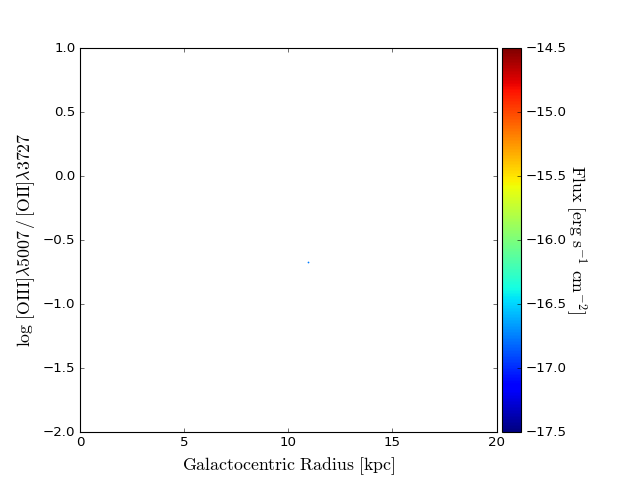

In [58]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
#plt.scatter(rro[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]/1000, ffo2h[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)])*2.87), marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]/1000, ffo2h[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]/1000, ffo2h[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]/1000, ffo2h[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]/1000, ffo2h[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]/1000, ffo2h[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
plt.scatter(rr[0]/1000, ffo3o2[0], marker='.', c=np.log10(fflu[0]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.1,0.03),xycoords='axes fraction',\
#            fontsize=12.0, color='k', backgroundcolor='w')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{log\,\,[OIII]\lambda5007\,/\,[OII]\lambda3727}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-2.0,1.0)
plt.show()    

In [59]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIIIOII_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


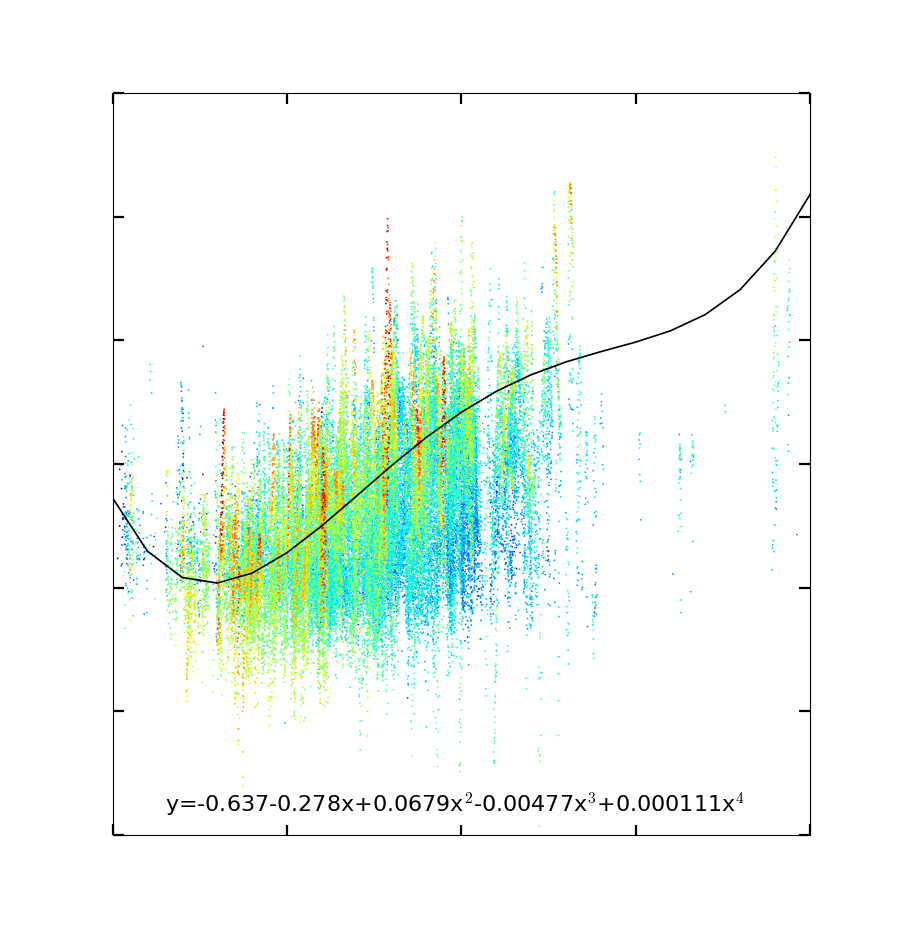

In [57]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffo3o2[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffo3o2[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffo3o2[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffo3o2[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffo3o2[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffo3o2[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) > -15)]/1000, ffo3o2[(np.log10(fflu) > -15)], marker='.', c=np.log10(fflu[(np.log10(fflu) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'{:04.3f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:06.5f}'.format(fitt[3])+'x$^3$'+'+'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.075,0.03),xycoords='axes fraction',\
            fontsize=20.0, color='k', backgroundcolor='w')
#plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel(r'$\mathrm{log\,\,[OIII]\lambda5007\,/\,H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-2.0,1.0)
plt.show()    

In [58]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIIIOII_rayon.png', transparent=False, bbox_inches='tight', pad_inches=0.0)

In [59]:
fn2h = deepcopy(n2h)
fo3h = deepcopy(o3h)
fo2h = deepcopy(o2h)
fo3o2h = np.zeros([2064,2048])
fs2s2 = np.zeros([2064,2048])
fo3o2h = deepcopy(o3o2h)
fs2s2 = deepcopy(s2s2)
fn2h[(aimage_dataha < 1.2e-18)] = -3
fn2h[(aimage_datan2 < 0.2e-18)] = -3
fo3o2h[(aimage_dataha < 1.2e-18)] = -3
fo3h[(aimage_dataha < 1.2e-18)] = -5
fo3h[(aimage_datao3 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fo2h[(aimage_dataha < 1.2e-18) ] = -5
fo2h[(aimage_datao2 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fn2h[(fn2h == 0)] = -3
fo3h[(fo3h == 0)] = -5
fo2h[(fo2h == 0)] = -5
fs2s2[(fs2s2 == 0)] = -5
fo3o2h[(fo3o2h == 0)] = -3
fo3o2[(fo3o2 == 0)] = -3
fo3o2 = fo3h - fo2h
fo3o2[(fo3o2 == 0)] = -5

ffo3o2 = np.array(len(fo3o2[(fo2h > -3) & (fo2h < 500) & (fo3h > -3) & (fo3h < 500)]))
ffo3o2h = np.array(len(fo3o2h[(fo3o2h > -3) & (fo3o2h < 500)]))
ffs2s2 = np.array(len(fs2s2[(fs2s2 > -3) & (fs2s2 < 500)]))
rr = np.array(len(o3o2h[(fo3o2h > -3) & (fo3o2h < 500)]))
dd = np.array(len(o3o2h[(fo3o2h > -3) & (fo3o2h < 500)]))
#for i in range(0,len(n2h[(n2h > -3) & (o3h > -5)])) :
ffo3o2 = fo3o2[(fo3o2 > -3) & (fo3o2 < 500)]
ffo3o2h = fo3o2h[(fo3o2h > -3) & (fo3o2h < 500)]
ffs2s2 = fs2s2[(fs2s2 > -3) & (fs2s2 < 500)]

rr = ra[(fo3o2h > -3) & (fo3o2h < 500)]
dd = d[(fo3o2h > -3) & (fo3o2h < 500)]
flu = (1.20671*10*aimage_dataha[(fo3o2h > -3) & (fo3o2h < 500)]*\
    fimage_dataha[(fo3o2h > -3) & (fo3o2h < 500)])
fflu = flu - grow2[(fo3o2h > -3) & (fo3o2h < 500)]

In [60]:
fit = np.polyfit(rr[(np.log10(fflu) > -15.8)]/1000, ffo3o2h[(np.log10(fflu) > -15.8)],4)
print fit
fitt = np.poly1d(fit)
print fitt

[  2.57124120e-05  -9.36917130e-04   6.29561800e-03   8.89115428e-02
  -1.48789691e-01]
           4             3            2
2.571e-05 x - 0.0009369 x + 0.006296 x + 0.08891 x - 0.1488


<IPython.core.display.Javascript object>


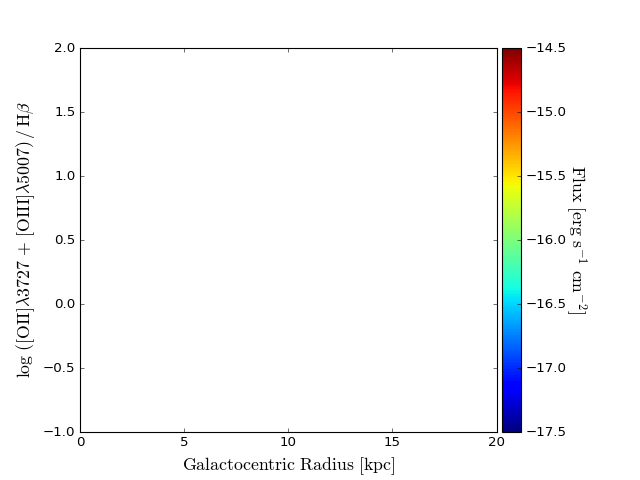

In [375]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
#plt.scatter(rro[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]/1000, ffo2h[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)])*2.87), marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]/1000, ffo2h[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]/1000, ffo2h[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]/1000, ffo2h[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]/1000, ffo2h[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]/1000, ffo2h[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
plt.scatter(rr[0]/1000, ffo3o2h[0], marker='.', c=np.log10(fflu[0]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.1,0.03),xycoords='axes fraction',\
#            fontsize=12.0, color='k', backgroundcolor='w')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{log\,\,([OII]\lambda3727\,+\,[OIII]\lambda5007)\,/\,H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1.0,2.0)
plt.show()    

In [376]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIIIOIIHb_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


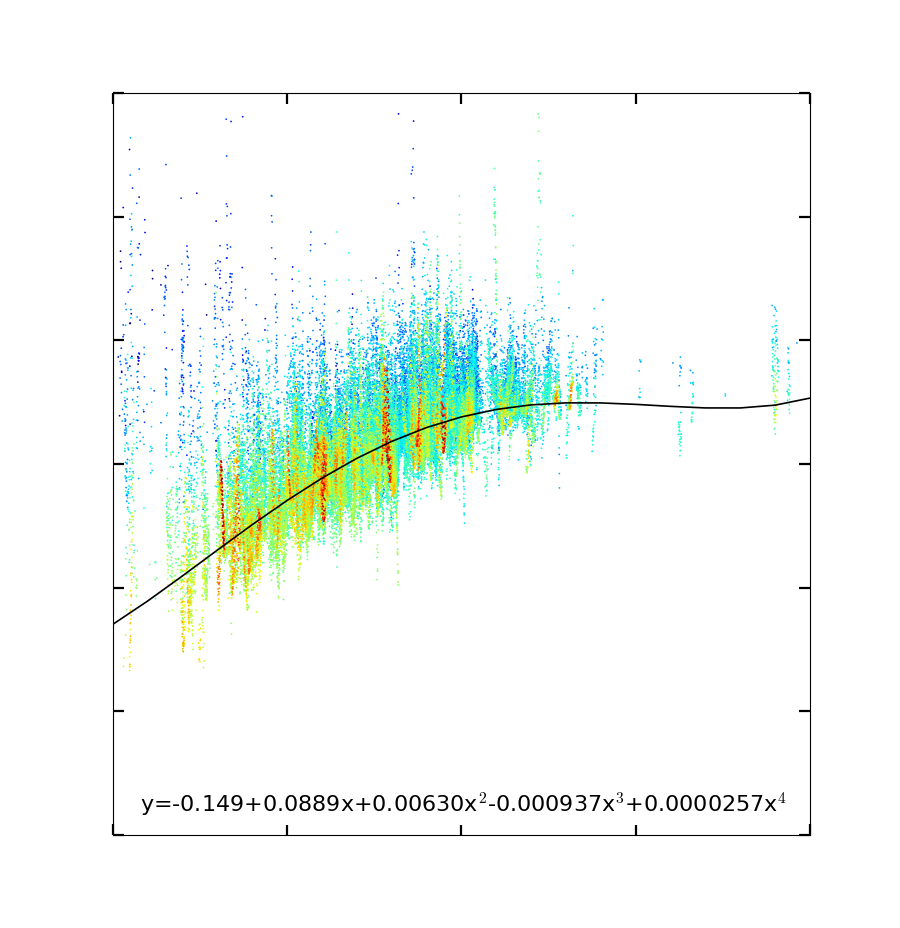

In [62]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffo3o2h[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffo3o2h[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffo3o2h[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffo3o2h[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffo3o2h[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffo3o2h[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) > -15)]/1000, ffo3o2h[(np.log10(fflu) > -15)], marker='.', c=np.log10(fflu[(np.log10(fflu) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
plt.annotate('y='+'{:04.3f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:06.5f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.04,0.03),xycoords='axes fraction',\
            fontsize=20.0, color='k', backgroundcolor='w')
#plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel(r'$\mathrm{log\,\,[OIII]\lambda5007\,/\,H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1.0,2.0)
plt.show()    

In [63]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_OIIIOIIH_rayon.png', transparent=False, bbox_inches='tight', pad_inches=0.0)

In [64]:
fn2h = deepcopy(n2h)
fo3h = deepcopy(o3h)
fo2h = deepcopy(o2h)
fo3o2h = np.zeros([2064,2048])
fs2s2 = np.zeros([2064,2048])
fo3o2h = deepcopy(o3o2h)
fs2s2 = deepcopy(s2s2)
fn2h[(aimage_dataha < 1.2e-18)] = -3
fn2h[(aimage_datan2 < 0.2e-18)] = -3
fo3o2h[(aimage_dataha < 1.2e-18)] = -3
fo3h[(aimage_dataha < 1.2e-18)] = -5
fo3h[(aimage_datao3 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fo2h[(aimage_dataha < 1.2e-18) ] = -5
fo2h[(aimage_datao2 < 0.2e-18) & (aimage_datahb < 0.2e-18)] = -5
fn2h[(fn2h == 0)] = -3
fo3h[(fo3h == 0)] = -5
fo2h[(fo2h == 0)] = -5
fs2s2[(fs2s2 == 0)] = -5
fs2s2[(aimage_datas21 < 1.2e-18)] = -5
fs2s2[(aimage_datas22 < 1.2e-18)] = -5
fo3o2h[(fo3o2h == 0)] = -3
fo3o2[(fo3o2 == 0)] = -3
fo3o2 = fo3h - fo2h
fo3o2[(fo3o2 == 0)] = -5

ffo3o2 = np.array(len(fo3o2[(fo2h > -3) & (fo2h < 500) & (fo3h > -3) & (fo3h < 500)]))
ffo3o2h = np.array(len(fo3o2h[(fo3o2h > -3) & (fo3o2h < 500)]))
ffs2s2 = np.array(len(fs2s2[(fs2s2 > -3) & (fs2s2 < 500)]))
rr = np.array(len(o3o2h[(fs2s2 > -3) & (fs2s2 < 500)]))
dd = np.array(len(o3o2h[(fs2s2 > -3) & (fs2s2 < 500)]))
#for i in range(0,len(n2h[(n2h > -3) & (o3h > -5)])) :
ffo3o2 = fo3o2[(fo3o2 > -3) & (fo3o2 < 500)]
ffo3o2h = fo3o2h[(fo3o2h > -3) & (fo3o2h < 500)]
ffs2s2 = 10**fs2s2[(fs2s2 > -3) & (fs2s2 < 500)]

rr = ra[(fs2s2 > -3) & (fs2s2 < 500)]
dd = d[(fs2s2 > -3) & (fs2s2 < 500)]
flu = (1.20671*10*aimage_dataha[(fs2s2 > -3) & (fs2s2 < 500)]*\
    fimage_dataha[(fs2s2 > -3) & (fs2s2 < 500)])
fflu = flu - grow2[(fs2s2 > -3) & (fs2s2 < 500)]

In [65]:
fit = np.polyfit(rr[(np.log10(fflu) > -16)]/1000, ffs2s2[(np.log10(fflu) > -16)],4)
print fit
fitt = np.poly1d(fit)
print fitt

[  1.20130289e-05  -6.09414403e-04   8.03084866e-03  -3.49697660e-02
   1.43773722e+00]
           4             3            2
1.201e-05 x - 0.0006094 x + 0.008031 x - 0.03497 x + 1.438


<IPython.core.display.Javascript object>


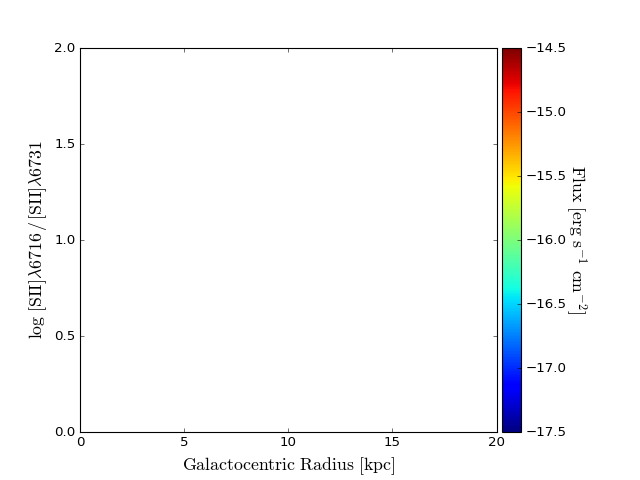

In [365]:
%matplotlib nbagg

cmin = -17.5
cmax = -14.5
#plt.scatter(rro[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]/1000, ffo2h[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)])*2.87), marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17.5) & (np.log10(ffluo) > -18)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]/1000, ffo2h[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -17) & (np.log10(ffluo) > -17.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]/1000, ffo2h[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16.5) & (np.log10(ffluo) > -17)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]/1000, ffo2h[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -16) & (np.log10(ffluo) > -16.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]/1000, ffo2h[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15.5) & (np.log10(ffluo) > -16)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
#plt.scatter(rro[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]/1000, ffo2h[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)] - np.log10(10**(ffn2ho2[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)])*2.87) , marker='.', c=np.log10(ffluo[(np.log10(ffluo) < -15) & (np.log10(ffluo) > -15.5)]), linewidths = 0.0, s = 10)
#plt.clim(cmin,cmax)
plt.scatter(rr[0]/1000, ffs2s2[0], marker='.', c=np.log10(fflu[0]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.25, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.25, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'+'+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:07.6f}'.format(fitt[3])+'x$^3$'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.1,0.03),xycoords='axes fraction',\
#            fontsize=12.0, color='k', backgroundcolor='w')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{log\,\,[SII]\lambda6716\,/\,[SII]\lambda6731}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(0,2.0)
plt.show()    

In [366]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_SIISII_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)

<IPython.core.display.Javascript object>


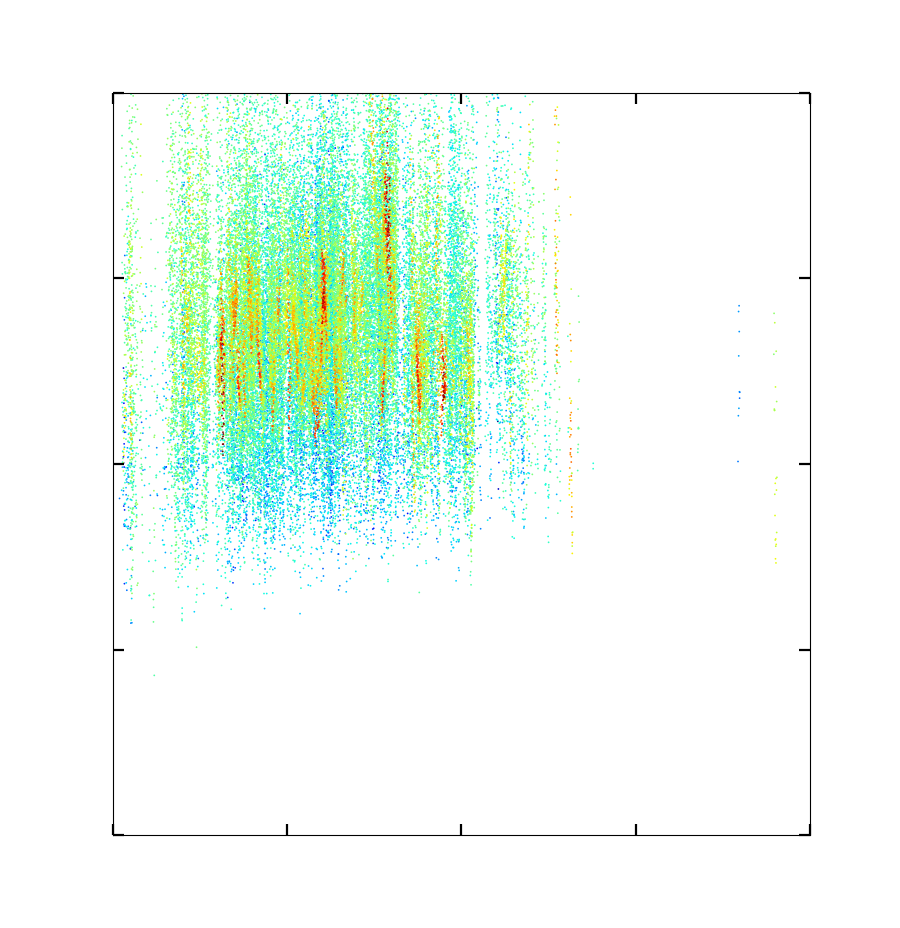

In [67]:
%matplotlib nbagg
fig = plt.figure(figsize=(11.25,11.6))
ax1 = fig.add_subplot(111)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    length=10,
    width=2,
    top='on',         # ticks along the top edge are off
    labelbottom='off', # labels along the bottom edge are off
    labelleft='off') # labels along the bottom edge are off
cmin = -17.5
cmax = -14.5
plt.scatter(rr[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]/1000, ffs2s2[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17.5) & (np.log10(fflu) > -18)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]/1000, ffs2s2[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -17) & (np.log10(fflu) > -17.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]/1000, ffs2s2[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16.5) & (np.log10(fflu) > -17)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]/1000, ffs2s2[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -16) & (np.log10(fflu) > -16.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]/1000, ffs2s2[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15.5) & (np.log10(fflu) > -16)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]/1000, ffs2s2[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)] , marker='.', c=np.log10(fflu[(np.log10(fflu) < -15) & (np.log10(fflu) > -15.5)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
plt.scatter(rr[(np.log10(fflu) > -15)]/1000, ffs2s2[(np.log10(fflu) > -15)], marker='.', c=np.log10(fflu[(np.log10(fflu) > -15)]), linewidths = 0.0, s = 10)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

#cbar=plt.colorbar(ticks=[-17.5,-17,-16.5,-16, -15.5,-15,-14.5],pad=0.01)
#cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(14),fitt(np.arange(14)), color='k', linewidth=1.5)
#plt.plot(np.arange(14),fitt(np.arange(14))+0.25, '--k')
#plt.plot(np.arange(14),fitt(np.arange(14))-0.25, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:06.5f}'.format(fitt[3])+'x$^3$'+'+'+'{:08.7f}'.format(fitt[4])+'x$^4$', xy=(0.05,0.03),xycoords='axes fraction',\
#            fontsize=20.0, color='k', backgroundcolor='w')
#plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
#plt.ylabel(r'$\mathrm{log\,\,[OIII]\lambda5007\,/\,H\beta}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(0,2.0)
plt.show()    

In [68]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_SIISII_rayon.png', transparent=False, bbox_inches='tight', pad_inches=0.0)